In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import statsmodels.api as sm

In [9]:
df = pd.read_csv("HDFC.csv")

In [10]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,HDFC,EQ,271.75,293.5,293.50,293.5,293.5,293.50,293.50,22744,6.675364e+11,NaN,NaN,NaN
1,2000-01-04,HDFC,EQ,293.50,317.0,317.00,297.0,304.0,304.05,303.62,255251,7.749972e+12,NaN,NaN,NaN
2,2000-01-05,HDFC,EQ,304.05,290.0,303.90,285.0,295.0,292.80,294.53,269087,7.925368e+12,NaN,NaN,NaN
3,2000-01-06,HDFC,EQ,292.80,301.0,314.00,295.0,296.0,296.45,300.14,305916,9.181669e+12,NaN,NaN,NaN
4,2000-01-07,HDFC,EQ,296.45,290.0,296.35,281.0,287.1,286.55,288.80,197039,5.690480e+12,NaN,NaN,NaN


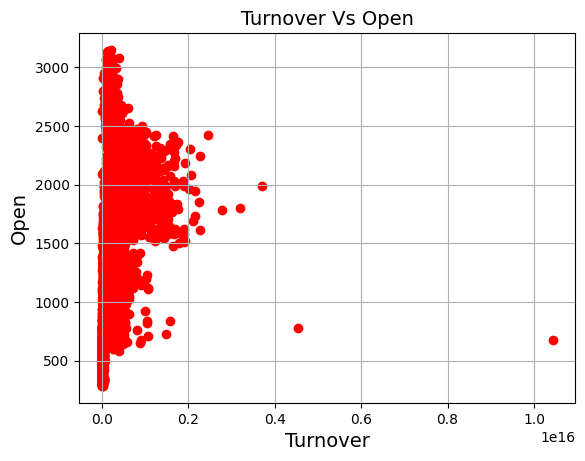

In [11]:
plt.scatter(df['Turnover'], df['Open'], color='red')
plt.title('Turnover Vs Open', fontsize=14)
plt.xlabel('Turnover', fontsize=14)
plt.ylabel('Open', fontsize=14)
plt.grid(True)
plt.show()

In [12]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()
print(correlation_matrix)


                    Prev Close      Open      High       Low      Last  \
Prev Close            1.000000  0.998577  0.998004  0.997904  0.997563   
Open                  0.998577  1.000000  0.999284  0.999301  0.998872   
High                  0.998004  0.999284  1.000000  0.998841  0.999407   
Low                   0.997904  0.999301  0.998841  1.000000  0.999339   
Last                  0.997563  0.998872  0.999407  0.999339  1.000000   
Close                 0.997606  0.998907  0.999448  0.999380  0.999958   
VWAP                  0.998055  0.999390  0.999640  0.999614  0.999784   
Volume                0.094629  0.094110  0.094817  0.093415  0.094555   
Turnover              0.371900  0.372209  0.373564  0.371819  0.373243   
Trades                0.548953  0.548854  0.560385  0.539309  0.549997   
Deliverable Volume   -0.000281 -0.000952 -0.001061 -0.001419 -0.000967   
%Deliverble          -0.299439 -0.299524 -0.303714 -0.296236 -0.300635   

                       Close      VWA

In [13]:
X = df[['Open','Close']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df['Turnover']

In [14]:
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression()

In [15]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 14635731902313.844
Coefficients: 
 [-1.19727818e+11  3.03951774e+11]


In [16]:
# prediction with sklearn
Open = 2.75
Close = 5.3
print ('Predicted Turnover: \n', regr.predict([[Open,Close]]))

Predicted Turnover: 
 [1.59174248e+13]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
